## Aufgabe 1 $\frac{e}{m}$-Bestimmung mit dem Fadenstrahlrohr
### 1.1 Untersuchung des Feldes eines Helmholtzspulenpaars 
Bauen Sie vor dem Plexiglaskasten mit Helmholtzspulen und Fadenstrahlrohr die zusätzliche Helmholtzspule mit Meßplatte so auf, dass sich die Meßplatte in der Mittelebene zwischen zwei Spulen befindet. Die Anordnung gleicht der Spulenanordnung, in der sich das Fadenstrahlrohr befindet. Die Spulen beiderseits der Meßplatte sind in Reihe zu schalten. Die Anschlüsse der betreffenden Spule im Plexiglaskasten sind an extra Buchsen herausgeführt. Die Meßplatte
kann an etlichen vorgesehenen Stellen die Hallsonde aufnehmen.\
Bild dieses Aufbaus:\
![](Helmholtz-Spulenpaar.jpg)  \
Messen Sie die Hallspannungen an den vorgesehenen Stellen für die Spulenströme $1.0$; $1.5$; und $2.0 A$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor

Welcome to JupyROOT 6.24/06


In [2]:
data=np.loadtxt('1.1hallspannungen_ströme.txt', skiprows=4) #importiere Daten
U_1A=data[:,0]*10**(-3)
U_15A=data[:,1]*10**(-3)
U_2A=data[:,2]*10**(-3)
print('gemessene Hallspannungen bei einem Spulenstrom von 1A:', U_1A, 'in V')
print('gemessene Hallspannungen bei einem Spulenstrom von 1.5A:', U_15A, 'in V')
print('gemessene Hallspannungen bei einem Spulenstrom von 2A:', U_2A, 'in V')

gemessene Hallspannungen bei einem Spulenstrom von 1A: [0.02344 0.0255  0.02587 0.02587 0.02606 0.02606 0.02512 0.02119 0.02587
 0.02662 0.02681 0.02681] in V
gemessene Hallspannungen bei einem Spulenstrom von 1.5A: [0.03731 0.04013 0.04106 0.04125 0.04125 0.04106 0.03919 0.03338 0.0405
 0.04163 0.042   0.04144] in V
gemessene Hallspannungen bei einem Spulenstrom von 2A: [0.0495  0.05325 0.05456 0.05494 0.05494 0.05496 0.05194 0.04406 0.05381
 0.05494 0.05438 0.05381] in V


### 1.2 Kalibrieren Sie die Hallsonde mit Hilfe des berechenbaren Feldes der langen Eichspule
Messen Sie etwa 10 Wertepaare (Hallspannung/Spulenstrom) und berechnen Sie daraus die Eichgerade B(UHall). Der Bereich der hier gemessenen Hallspannungen sollte zu den bei Aufgabe 1.1 gemessenen Werten passen.

In [3]:
data=np.loadtxt('1.2hallspannungen_ströme.txt', skiprows=7) #importiere gemessene Daten
U_hall=data[:,1]*10**(-3)
I_sp=data[:,0]
print('angelegter Spulenstrom:',I_sp, 'in A')
print('gemessene Hallspannung:',U_hall, 'in V')

angelegter Spulenstrom: [0.103 0.164 0.211 0.291 0.355 0.498 0.598 0.745 0.881 0.928] in A
gemessene Hallspannung: [0.01106 0.01706 0.02175 0.03    0.03656 0.05006 0.06075 0.075   0.08944
 0.09356] in V


$B_{UHall}$ berechnen mit folgender Formel: $B_{UHall}=\frac{\mu_{0} \cdot I\cdot N}{L}$ \
Wobei N die Anzahl der Windungen, L die Länge der Spule und $\mu_{0}$ die magnetische Feldkonstante mit einem Wert von $\mu_{0}=1.256637 \cdot 10^{-6} \frac{N}{A^2}$ ist.

In [6]:
y0=1.256637*10**(-6)
L= 0.3
N=750
B_hall=(y0*I_sp*N)/L
print(U_hall,B_hall)
#B_hall.pop(0)
#B_hall.pop(6) # Entfernen 0,6,7 für experimentelle bestimmung
#B_hall.pop(7)
indexes = [0, 6, 7]
B_hall = np.delete(B_hall, indexes)
U_hall = np.delete(U_hall, indexes)
print(B_hall)

[0.01106 0.01706 0.02175 0.03    0.03656 0.05006 0.06075 0.075   0.08944
 0.09356] [0.00032358 0.00051522 0.00066288 0.0009142  0.00111527 0.00156451
 0.00187867 0.00234049 0.00276774 0.0029154 ]
[0.00051522 0.00066288 0.0009142  0.00111527 0.00156451 0.00276774
 0.0029154 ]


/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1034: UserWarning: Cost function expects errors but no errors were specified.
  warnings.warn("Cost function expects errors but no errors were specified.")
/opt/conda/lib/python3.9/site-packages/kafe2/fit/util/__init__.py:73: RuntimeWarning: divide by zero encountered in log
  return 2.0 * np.sum(np.log(pointwise_error))
/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/cost.py:330: UserWarning: Setting all data errors to 1 as a fallback.
  warnings.warn("Setting all data errors to 1 as a fallback.")
/opt/conda/lib/python3.9/site-packages/kafe2/fit/util/__init__.py:54: UserWarning: Singular covariance matrix. Are the errors for some data points equal to zero?
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/cost.py:330: UserWarning: Setting all data errors to 1 as a fallback.
  warnings.warn("Setting all data errors to 1 as a fallback.")


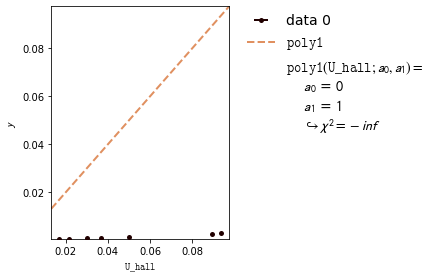

In [8]:
def poly1(U_hall, a_0=0.0, a_1=1.0):
    return a_0 + a_1*U_hall

# Ablesegenauigkeit U_hall
#xerr=U_hall_genauigkeit

# Genauigkeit B_uhall:
#B_hall_genauigkeit=(y0*I_sp_genauigkeit*N)/L_genauigkeit
#yerr=B_hall_genauigkeit
#yerr: 0.1
# Define the fit
fit = XYFit(xy_data = [U_hall, B_hall], model_function = poly1)

# Add errors
#fit.add_error(axis = 'y', err_val = yerr)
#fit.add_error(axis = 'x', err_val = xerr)


# Optional: Assign LaTeX expressions to the function and its variables.
fit.assign_parameter_latex_names(a_0='a_0', a_1='a_1')
fit.assign_model_function_latex_expression("y=a_0 + a_1*U_hall")


# Do the fit
fit.do_fit()


# Get a report about the fit in the output
#fit.report()

# Finaly plot the fit
plot = Plot(fit)
plot.plot()


# and show everything
plt.show()


In [ ]:
B0=-1.9*10**(-5)
B1=0.0313
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)
def B_hall(U, B0=-1.9*10**(-5), B1=0.0313):
    return B0 + B1*U
print('Damit ergibt sich für die Eichgerade: B_hall(U)=',round_sig(B0,4),'+',round_sig(B1,4),'* U')

### 1.3 Vergleichen Sie den gemessenen Wert des Mittenfeldes zwischen den Helmholtzspulen mit dem berechneten Wert. Überprüfen Sie die Feldhomogenität bei der vorliegenden Spulenanordnung. 
Unter der Voraussetzung Spulenradius = Spulenabstand = R gilt für das Mittenfeld $$B=0.7155\cdot \mu_{0} \cdot n \cdot \frac{I}{R}$$
Dabei ist n die Windungszahl der Spule und I der Strom in der Spule.

In [11]:
B_mess=B_hall
y0=1.256637*10**(-6)
n=2
R=0.5
def B_rech(I, y0, n, R):
    return 0.7155*y0*n*I/R


In [12]:
B_1A_mess=B_mess(U_1A)
B_1A_mess_mean=np.mean(B_1A_mess)
B_1A_mess_abw=np.sqrt(np.var(B_1A_mess))
B_1A_mess_u=ufloat(B_1A_mess_mean,B_1A_mess_abw)
B_rech(1, y0, n, R)

B_15A_mess=B_mess(U_15A)
B_15A_mess_mean=np.mean(B_15A_mess)
B_15A_mess_abw=np.sqrt(np.var(B_15A_mess))
B_15A_mess_u=ufloat(B_15A_mess_mean,B_15A_mess_abw)
B_rech(2, y0, n, R)

B_2A_mess=B_mess(U_2A)
B_2A_mess_mean=np.mean(B_2A_mess)
B_2A_mess_abw=np.sqrt(np.var(B_2A_mess))
B_2A_mess_u=ufloat(B_2A_mess_mean,B_2A_mess_abw)
B_rech(2, y0, n, R)

TypeError: 'numpy.ndarray' object is not callable

Dies sind die berechneten Einzelwerte von 

In [ ]:
print('Für die gemessene Stromstärke von 1A ergibt sich ein durschnittliches B-Feld mit folgender Stärke:',B_1A_mess_u,'T')